# Forward modeling tutorial using mosaic images
## Fitting models

In [1]:
from grizli import model
import numpy as np
import matplotlib.pyplot as plt
from sim_tools import *
from scipy.interpolate import interp1d
from astropy.table import Table
from astropy import wcs
from astropy.io import fits
from glob import glob
import seaborn as sea
import os

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Create spectra object

In [7]:
sp = Gen_spec('beams/o195.0_21156.g102.A.fits', 1.249, 'galaxy_spec.npy')
spMB = Gen_MB_spec('beams/gnd_21156.beams.fits', 1.249, 'galaxy_spec.npy')

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt

1 /Users/Vince.ec/Clear_data/n_flt_files/icat21cfq_flt.fits G102
2 /Users/Vince.ec/Clear_data/n_flt_files/icat21coq_flt.fits G102
3 /Users/Vince.ec/Clear_data/n_flt_files/icat21dgq_flt.fits G102
4 /Users/Vince.ec/Clear_data/n_flt_files/icat21dlq_flt.fits G102
5 /Users/Vince.ec/Clear_data/n_flt_files/icat25hcq_flt.fits G102
6 /Users/Vince.ec/Clear_data/n_flt_files/icat25hiq_flt.fits G102
7 /Users/Vince.ec/Clear_data/n_flt_files/icat25icq_flt.fits G102
8 /Users/Vince.ec/Clear_data/n_flt_files/icat25iiq_flt.fits G102
9 /Users/Vince.ec/Clear_data/n_flt_files/icxt51jvq_flt.fits G102
10 /Users/Vince.ec/Clear_data/n_flt_files/icxt51jwq_flt.fits G102
11 /Users/Vince.ec/Clear_data/n_flt_files/icxt51jzq_flt.fits G102
12 /Users/Vince.ec/Clear_data/n_flt_files/icxt51k1q_flt.fits G102
13 /Users/Vince.ec/Clear_data/n_flt_files/icxt52i0q_flt.fits G102
14 /Users/Vince.ec/Clear_data/n_flt_files/icxt52i1q_flt.fits G102
15 /Users/Vince.ec/Clear_data/n_flt_files/icxt52i4q_flt.fits G102
16 /Users/Vince.ec/

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1200: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1328: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1333: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2948: FutureWarning: `rcond` parameter will change to the default of

In [3]:
age = np.arange(1.0,6.5,0.5)

In [4]:
def Chi_Squared(data, model, error):
    return np.sum(((data-model) / error)**2)

In [8]:
chisq = np.zeros(age.size)
chisqmb = np.zeros(age.size)

for i in range(age.size):
    sp.Sim_spec('model_spec/m0.019_a{0}_dt8.0_spec.npy'.format(age[i]))
    spMB.Sim_spec('model_spec/m0.019_a{0}_dt8.0_spec.npy'.format(age[i]))
    
    chisq[i] = Chi_Squared(sp.gal_fl, sp.fl, sp.gal_er)
    chisqmb[i] = Chi_Squared(spMB.gal_fl, spMB.fl, spMB.gal_er)    

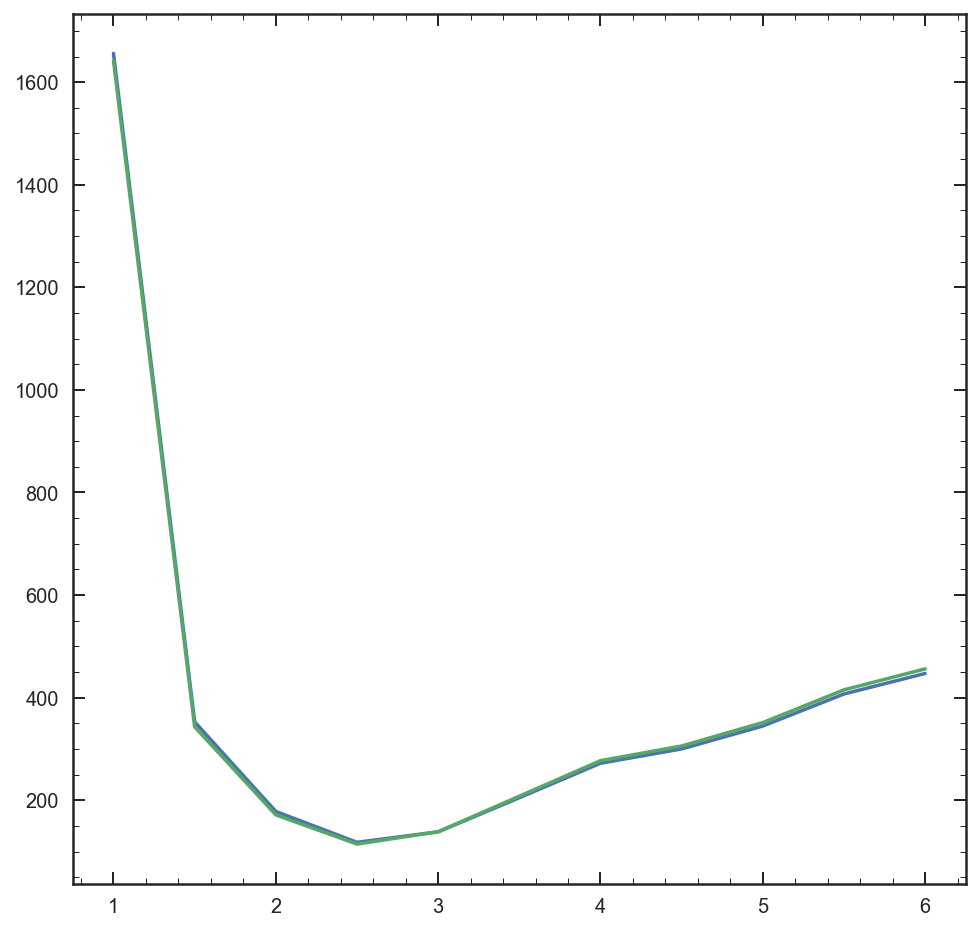

In [9]:
plt.figure(figsize=[8,8])
plt.plot(age,chisq)
plt.plot(age,chisqmb)